## HW_30_Linear Regression on Insurances data set

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

In [4]:
mydata=pd.read_csv(r"C:\Users\Dell\Desktop\ML-programing\dataset\DataSets-master\DataSets-master\laptop_price.csv")

In [5]:
mydata

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [6]:
mydata.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [8]:
mydata.describe().T

,count,mean,std,min,25%,50%,75%,max
laptop_ID,1303.0,660.155794,381.172104,1.0,331.5,659.0,990.50,1320.0
Inches,1303.0,15.017191,1.426304,10.1,14.0,15.6,15.60,18.4
Price_euros,1303.0,1123.686992,699.009043,174.0,599.0,977.0,1487.88,6099.0


### Data Visualization

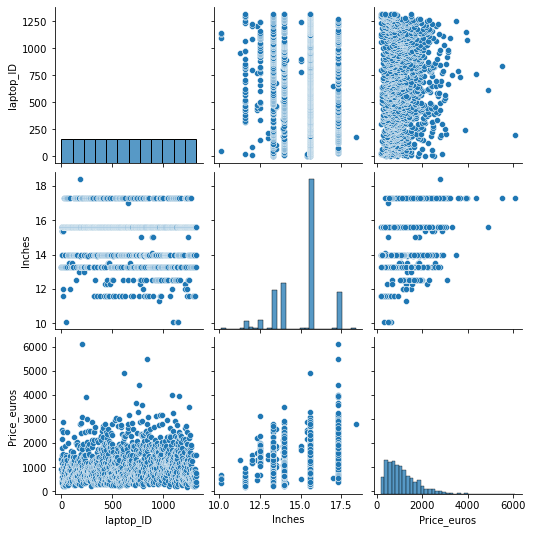

In [9]:
sb.pairplot(mydata)
plt.show()

In [10]:
mydata.corr().T

,laptop_ID,Inches,Price_euros
laptop_ID,1.000000,-0.087796,0.067830
Inches,-0.087796,1.000000,0.068197
Price_euros,0.067830,0.068197,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

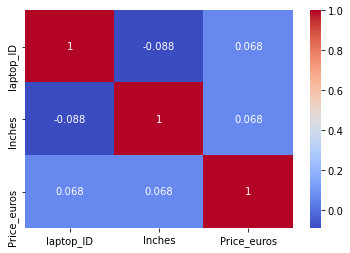

In [11]:
sb.heatmap(mydata.corr(),annot=True,cmap="coolwarm")
plt.show

#### Model Inches and price_euros

In [13]:
mydata.keys()

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [14]:
x_inches=mydata[["Inches"]]

In [15]:
x_inches

,Inches
0,13.3
1,13.3
2,15.6
3,15.4
4,13.3
...,...
1298,14.0
1299,13.3
1300,14.0
1301,15.6


In [16]:
y_prices_euros=mydata[["Price_euros"]]

In [17]:
y_prices_euros

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60
...,...
1298,638.00
1299,1499.00
1300,229.00
1301,764.00


#### Converting Inches and price_euros into array

In [18]:
XA=x_inches.values

In [19]:
XA

array([[13.3],
       [13.3],
       [15.6],
       ...,
       [14. ],
       [15.6],
       [15.6]])

In [20]:
YA=y_prices_euros.values

In [21]:
YA

array([[1339.69],
       [ 898.94],
       [ 575.  ],
       ...,
       [ 229.  ],
       [ 764.  ],
       [ 369.  ]])

In [23]:
Mean1=XA.mean()
std1=XA.std()
print("Before scalling mean {} and std {}".format(Mean1,std1))

Before scalling mean 15.017191097467379 and std 1.4257566340713312


In [24]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [25]:
XA=StandardScaler().fit(XA).transform(XA.astype(float))
XA

array([[-1.20440688],
       [-1.20440688],
       [ 0.40877166],
       ...,
       [-0.7134395 ],
       [ 0.40877166],
       [ 0.40877166]])

In [27]:
Mean2=int(XA.mean())
std2=XA.std()
print("After scalling mean {} and std {}".format(Mean2,std2))

After scalling mean 0 and std 1.0


#### Splitting data into training data and testing data

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(XA,YA,test_size=.30,random_state=101)

In [31]:
print("XArr shape",XA.shape)
print("Xtrain shape",Xtrain.shape)
print("Xtest shape",Xtest.shape)
print("YArr shape",YA.shape)
print("Ytrain shape",Ytrain.shape)
print("Ytest shape",Ytest.shape)

XArr shape (1303, 1)
Xtrain shape (912, 1)
Xtest shape (391, 1)
YArr shape (1303, 1)
Ytrain shape (912, 1)
Ytest shape (391, 1)


#### Training Model

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error

In [33]:
lr_model=LinearRegression(fit_intercept=True)
lr_learner=lr_model.fit(Xtrain,Ytrain)

In [35]:
lr_model.predict([Xtest[15]])

array([[1142.84213482]])

In [36]:
Ypre=lr_learner.predict(Xtest)
Yact=Ytest

In [37]:
pd.DataFrame({"Yact":list(Ytest),"yp":list(Ypre)})

,Yact,yp
0,[655.0],[1049.9260728715499]
1,[2254.0],[1049.9260728715499]
2,[398.99],[1142.8421348187019]
3,[393.49],[1142.8421348187019]
4,[191.9],[981.2489836062634]
...,...,...
386,[1748.9],[1049.9260728715499]
387,[1686.64],[1078.2048743337266]
388,[369.0],[1142.8421348187019]
389,[2049.0],[1078.2048743337266]


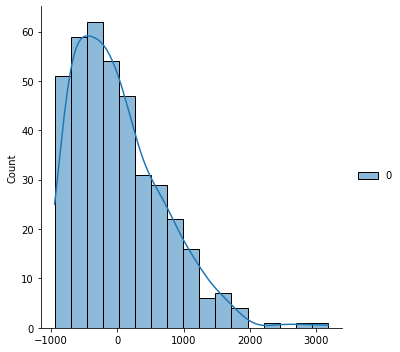

In [38]:
sb.displot(Yact-Ypre,kind='hist',kde=True)
plt.show()

In [39]:
#score
error=mean_squared_error(Yact,Ypre)
print(error)

455121.03536103433


In [40]:
c=lr_learner.intercept_
m=lr_learner.coef_
print("m{} and c {}".format(m,c))

m[[57.59812684]] and c [1119.29765304]


In [41]:
Ypeq=Xtest*m+c

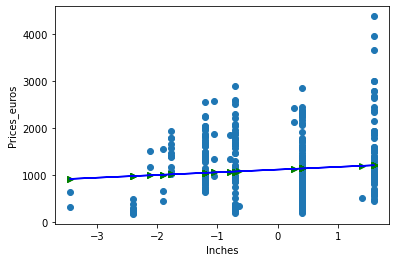

In [43]:
plt.scatter(Xtest,Ytest)
plt.plot(Xtest,Ypre,"g>")
plt.plot(Xtest,Ypre,"b")
plt.xlabel("Inches")
plt.ylabel("Prices_euros")
plt.show()